<center><h1>Mass parameterized deep neural networks on SR2 </h1>
John Ignacio R.M. Oct 2020</center>

In [1]:
# Libraries
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada.data import read_dataset, split_dataset_by_mass, scores_per_mass
from ada.model import BinaryClassifierModel4 as BC4, BinaryClassifierModel1 as BC1
from ada.plot import plot_confidence_matrix
import pandas as pd

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
# Constants
seed = 420
source_path = "../../processed_data/xtohhOct2020"
dest_path = "../../saved_models/oct_2020"
signal = "Xtohh"
bg = "Xtohh_background"
region = "SR"
tag = 2
masses = [1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000]

In [3]:
# Read dataset
dfs = {mass: read_dataset(source_path, signal+str(mass), bg, region, tag) for mass in masses}
df = pd.concat(dfs, names = ["mass", None])
df = df.reset_index(level = 0).reset_index(drop = True)
df.head()

,mass,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,1000,0.000457,1,498.51450,-0.536601,-2.818808,119716.39,447.70572,-1.163481,1.234735,97467.30,2.229642,2.316092,0.605876,71.70186,927.69910,419.146580
1,1000,0.000348,1,549.95325,-1.375417,1.734355,121275.48,302.23140,-1.598841,-1.238216,96785.60,2.972570,2.980955,-0.169232,84.82113,846.36835,257.105600
2,1000,0.000591,1,513.64594,0.340504,-2.402172,134068.61,362.13004,-0.013702,0.731264,100451.04,3.133436,3.153392,0.193749,81.10068,907.06665,151.556750
3,1000,0.000620,1,483.49622,-1.430659,-0.469333,111137.67,410.57037,-1.323875,2.663501,105842.83,3.132834,3.134654,0.164603,64.79518,918.62680,73.030174
4,1000,0.000562,1,456.22528,-0.444622,0.358149,165661.98,363.99133,-0.550266,-2.998335,94892.64,2.926702,2.928608,-0.206495,151.07983,853.51350,127.067240


# BC4 Parameterized by Mass on SR2

In [4]:
sets = split_dataset_by_mass(df, 0.5, 0.3, 0.2, seed, masses)

In [5]:
model = BC4(sets["x"]["train"].shape[1])
model.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50, verbose = 1
)

Train on 23237 samples, validate on 17433 samples
Epoch 1/50
23237/23237 [==============================] - 1s 51us/step - loss: 5.6272e-04 - val_loss: 4.6829e-04
Epoch 2/50
23237/23237 [==============================] - 1s 45us/step - loss: 3.8138e-04 - val_loss: 3.4370e-04
Epoch 3/50
23237/23237 [==============================] - 1s 44us/step - loss: 2.9971e-04 - val_loss: 2.9145e-04
Epoch 4/50
23237/23237 [==============================] - 1s 45us/step - loss: 2.8075e-04 - val_loss: 2.5466e-04
Epoch 5/50
23237/23237 [==============================] - 1s 44us/step - loss: 2.5502e-04 - val_loss: 2.5581e-04
Epoch 6/50
23237/23237 [==============================] - 1s 48us/step - loss: 2.4541e-04 - val_loss: 2.5732e-04
Epoch 7/50
23237/23237 [==============================] - 1s 46us/step - loss: 2.2729e-04 - val_loss: 2.6591e-04
Epoch 8/50
23237/23237 [==============================] - 1s 47us/step - loss: 2.4670e-04 - val_loss: 2.4228e-04
Epoch 9/50
23237/23237 [======================

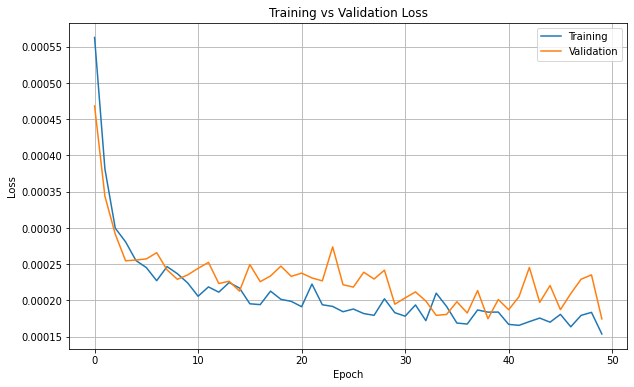

In [6]:
model.plot_loss()

Accuracy: 0.9766925010620368


,0,1,macro avg,weighted avg
precision,0.973944,0.982257,0.978101,0.976789
recall,0.991083,0.949027,0.970055,0.976693
f1-score,0.982439,0.965356,0.973898,0.976594
support,0.360450,0.187494,0.547944,0.547944


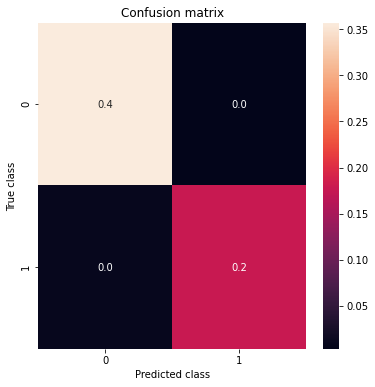

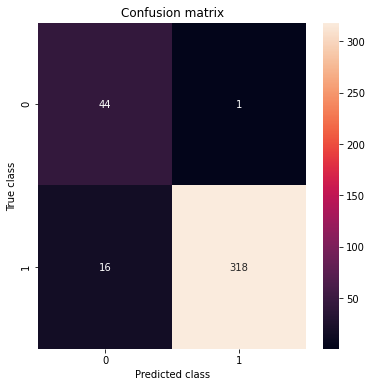

Accuracy: 0.9485520063053865


,0,1,macro avg,weighted avg
precision,0.905453,0.971363,0.938408,0.949474
recall,0.943612,0.951008,0.947310,0.948552
f1-score,0.924138,0.961078,0.942608,0.948811
support,0.496357,0.998274,1.494630,1.494630


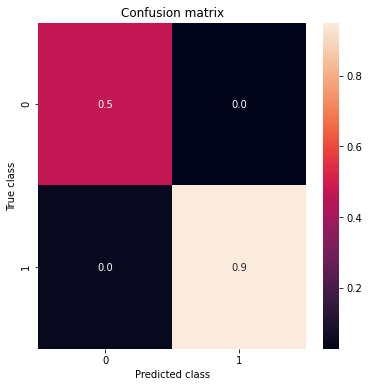

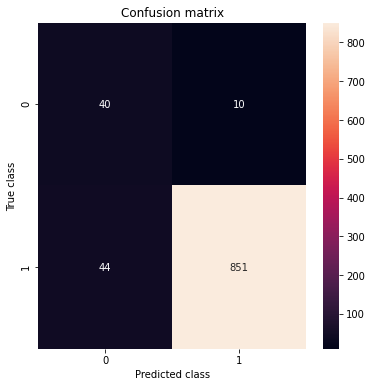

Accuracy: 0.9604485737214438


,0,1,macro avg,weighted avg
precision,0.902447,0.983631,0.943039,0.961761
recall,0.956590,0.961871,0.959231,0.960449
f1-score,0.928730,0.972630,0.950680,0.960803
support,0.575024,1.559477,2.134501,2.134501


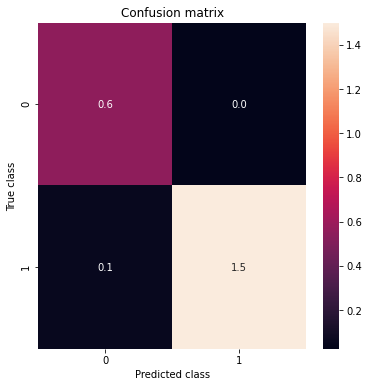

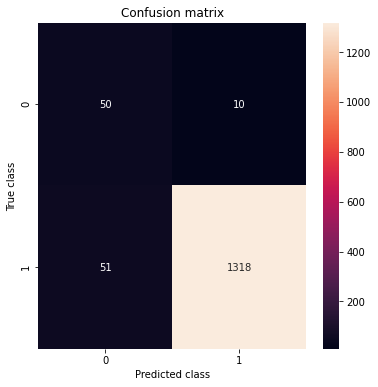

Accuracy: 0.9231901675768821


,0,1,macro avg,weighted avg
precision,0.756527,0.948558,0.852543,0.920793
recall,0.691215,0.962400,0.826807,0.923190
f1-score,0.722398,0.955429,0.838913,0.921736
support,0.312190,1.847002,2.159192,2.159192


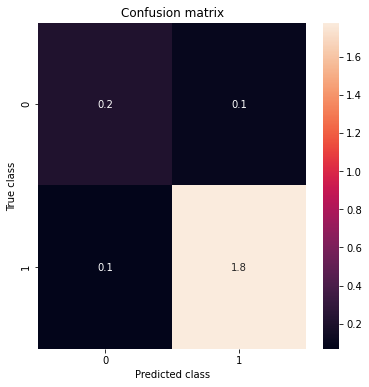

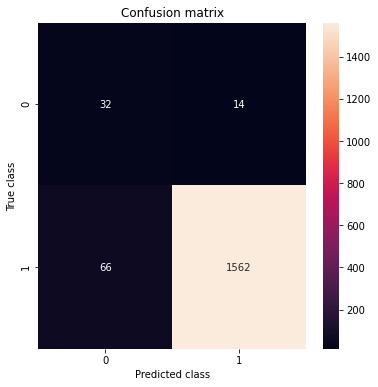

Accuracy: 0.9608429269045188


,0,1,macro avg,weighted avg
precision,0.852017,0.975704,0.913860,0.960398
recall,0.827247,0.979709,0.903478,0.960843
f1-score,0.839450,0.977702,0.908576,0.960594
support,0.278024,1.968723,2.246747,2.246747


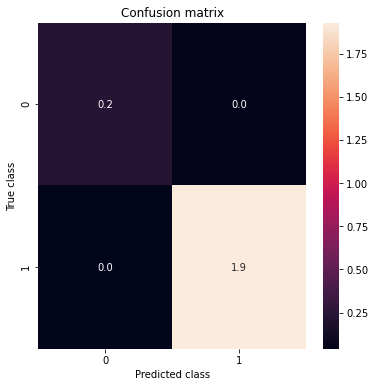

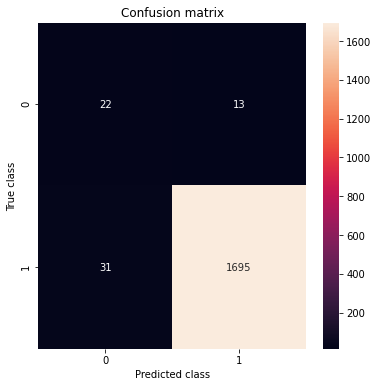

Accuracy: 0.9815487828949953


,0,1,macro avg,weighted avg
precision,0.928634,0.992918,0.960776,0.981985
recall,0.965725,0.984791,0.975258,0.981549
f1-score,0.946816,0.988838,0.967827,0.981692
support,0.397218,1.938392,2.335610,2.335610


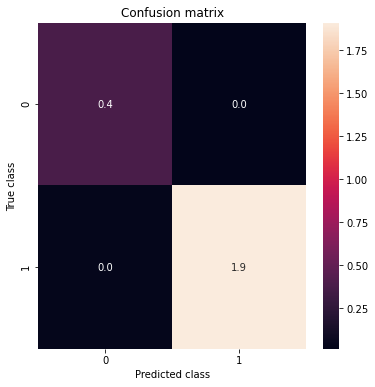

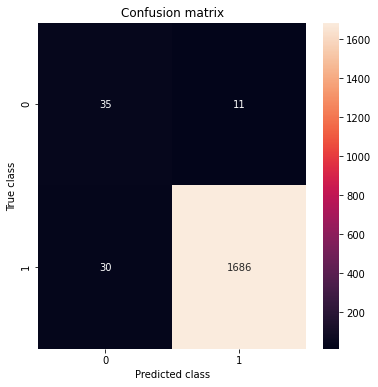

Accuracy: 0.9829693736146968


,0,1,macro avg,weighted avg
precision,0.974622,0.985026,0.979824,0.982897
recall,0.941286,0.993694,0.967490,0.982969
f1-score,0.957664,0.989341,0.973502,0.982859
support,0.397792,1.546116,1.943909,1.943909


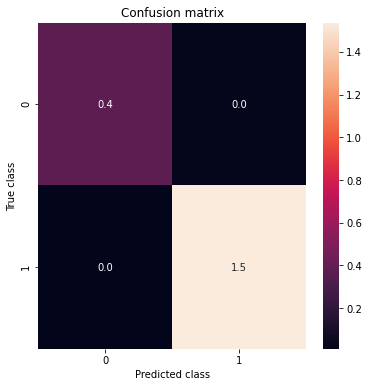

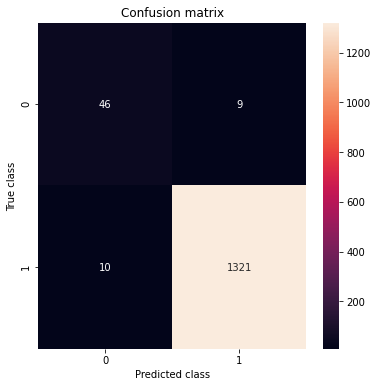

Accuracy: 0.9829043075674553


,0,1,macro avg,weighted avg
precision,0.982672,0.983040,0.982856,0.982903
recall,0.971425,0.989764,0.980594,0.982904
f1-score,0.977016,0.986391,0.981703,0.982884
support,0.541472,0.906135,1.447607,1.447607


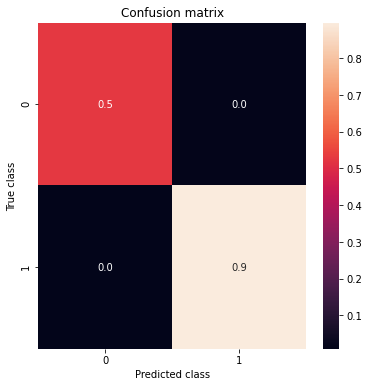

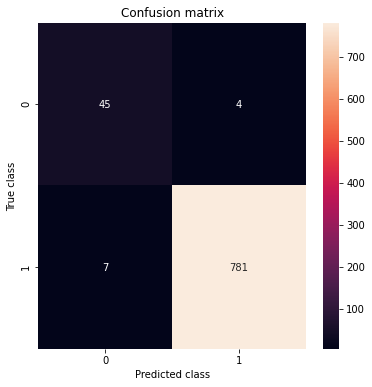

In [10]:
scores_per_mass(model, sets, masses, 0.7, save = True, dest_path="./scores", title="SR2_Oct2020")

In [9]:
model.save(dest_path, f"MassParam_SR2_Oct2020")

# BC1 Parameterized by Mass on SR2

In [11]:
sets2 = split_dataset_by_mass(df, 0.6, 0.2, 0.2, seed, masses)

In [12]:
model2 = BC1(sets["x"]["train"].shape[1])
model2.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50, verbose = 1
)

Train on 23237 samples, validate on 17433 samples
Epoch 1/50
23237/23237 [==============================] - 3s 145us/step - loss: 0.0020 - val_loss: 7.3486e-04
Epoch 2/50
23237/23237 [==============================] - 3s 120us/step - loss: 7.3957e-04 - val_loss: 6.1282e-04
Epoch 3/50
23237/23237 [==============================] - 3s 126us/step - loss: 6.6979e-04 - val_loss: 5.6602e-04
Epoch 4/50
23237/23237 [==============================] - 3s 123us/step - loss: 6.1116e-04 - val_loss: 5.4227e-04
Epoch 5/50
23237/23237 [==============================] - 3s 118us/step - loss: 5.9846e-04 - val_loss: 5.1019e-04
Epoch 6/50
23237/23237 [==============================] - 3s 133us/step - loss: 6.0093e-04 - val_loss: 4.9648e-04
Epoch 7/50
23237/23237 [==============================] - 3s 127us/step - loss: 5.6536e-04 - val_loss: 5.1603e-04
Epoch 8/50
23237/23237 [==============================] - 3s 128us/step - loss: 5.5423e-04 - val_loss: 5.0415e-04
Epoch 9/50
23237/23237 [==================

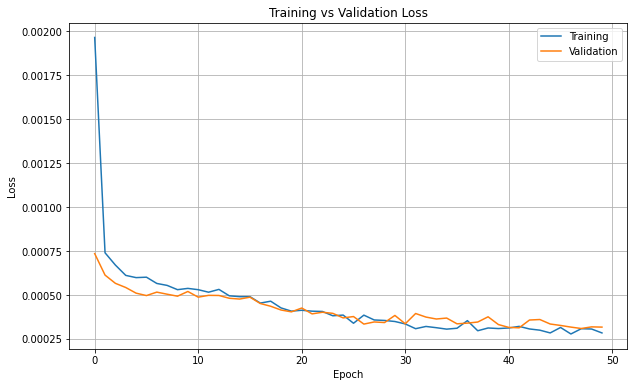

In [13]:
model2.plot_loss()

Accuracy: 0.9843574948444587


,0,1,macro avg,weighted avg
precision,0.992778,0.968609,0.980694,0.984508
recall,0.983374,0.986248,0.984811,0.984357
f1-score,0.988054,0.977349,0.982701,0.984391
support,0.360450,0.187494,0.547944,0.547944


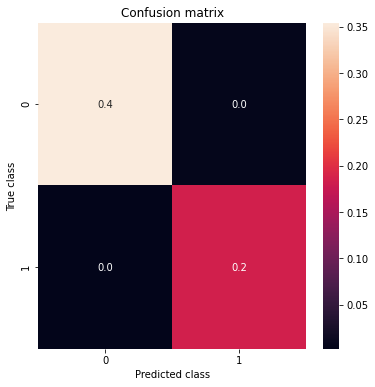

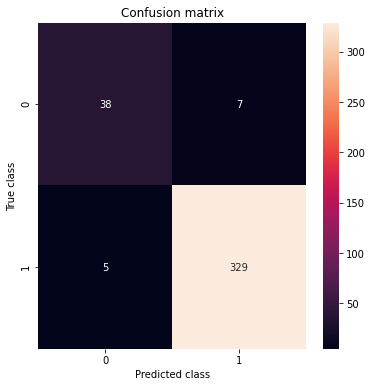

Accuracy: 0.8649287778033204


,0,1,macro avg,weighted avg
precision,0.947299,0.841664,0.894482,0.876745
recall,0.628223,0.982622,0.805423,0.864929
f1-score,0.755451,0.906698,0.831074,0.856470
support,0.496357,0.998274,1.494630,1.494630


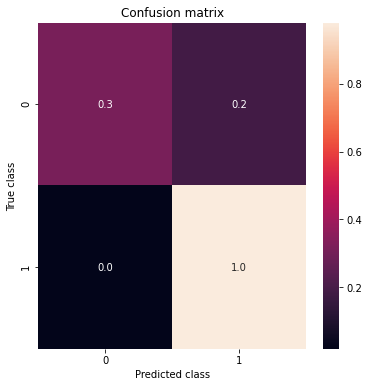

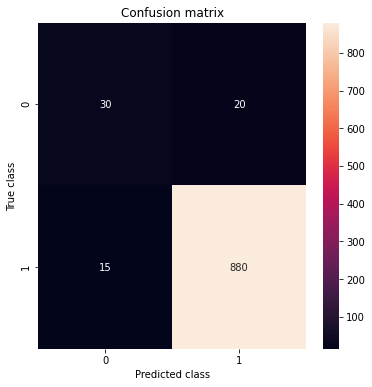

Accuracy: 0.7663497176643415


,0,1,macro avg,weighted avg
precision,0.881189,0.760700,0.820945,0.793159
recall,0.153364,0.992375,0.572870,0.766350
f1-score,0.261258,0.861230,0.561244,0.699600
support,0.575024,1.559477,2.134501,2.134501


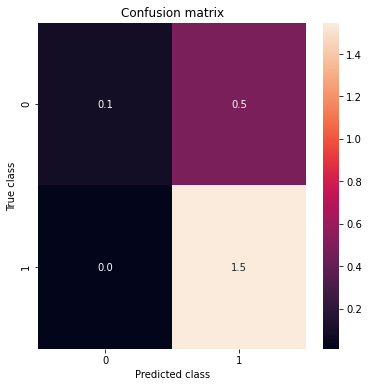

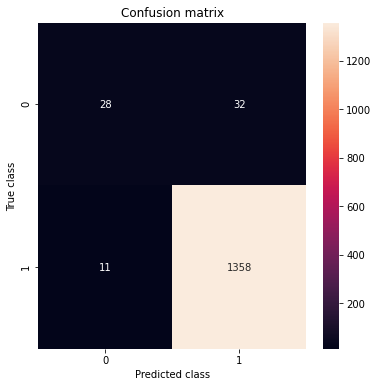

Accuracy: 0.8918409128913981


,0,1,macro avg,weighted avg
precision,0.860923,0.893484,0.877203,0.888776
recall,0.300483,0.991795,0.646139,0.891841
f1-score,0.445482,0.940076,0.692779,0.868565
support,0.312190,1.847002,2.159192,2.159192


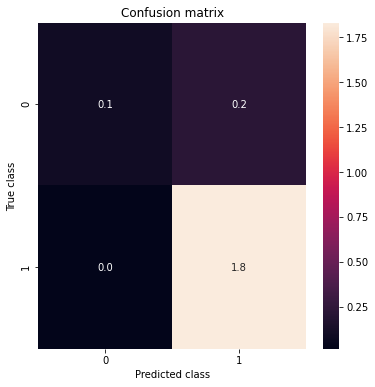

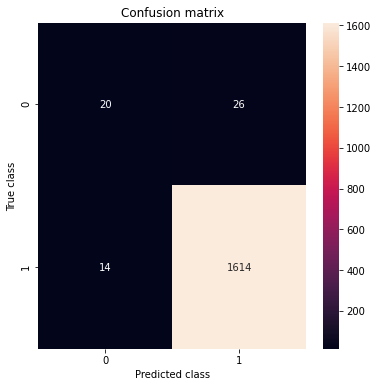

Accuracy: 0.9362449265539048


,0,1,macro avg,weighted avg
precision,0.911459,0.938194,0.924826,0.934886
recall,0.536947,0.992634,0.764790,0.936245
f1-score,0.675784,0.964646,0.820215,0.928901
support,0.278024,1.968723,2.246747,2.246747


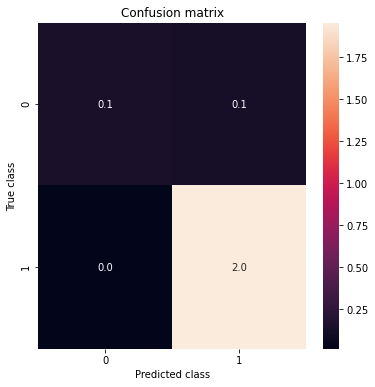

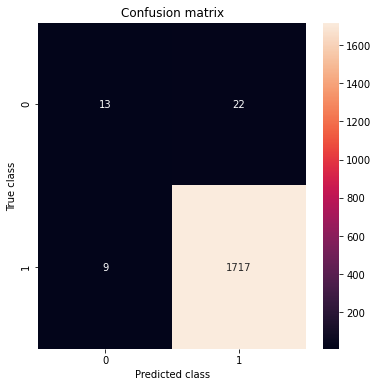

Accuracy: 0.9510467659827343


,0,1,macro avg,weighted avg
precision,0.942397,0.952419,0.947408,0.950714
recall,0.758523,0.990499,0.874511,0.951047
f1-score,0.840521,0.971086,0.905803,0.948880
support,0.397218,1.938392,2.335610,2.335610


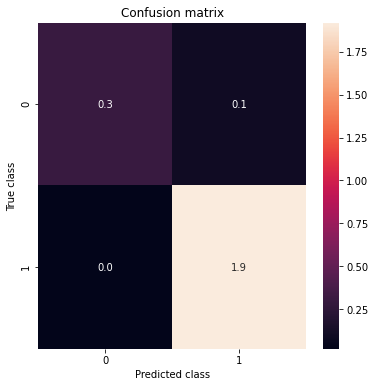

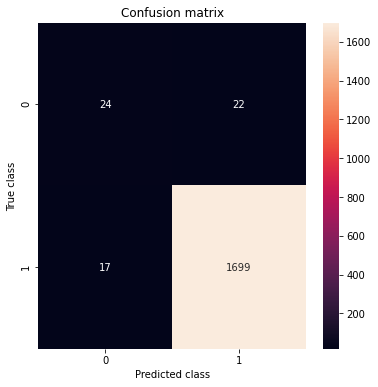

Accuracy: 0.9765126353677694


,0,1,macro avg,weighted avg
precision,0.978025,0.976159,0.977092,0.976541
recall,0.905570,0.994765,0.950168,0.976513
f1-score,0.940404,0.985374,0.962889,0.976172
support,0.397792,1.546116,1.943909,1.943909


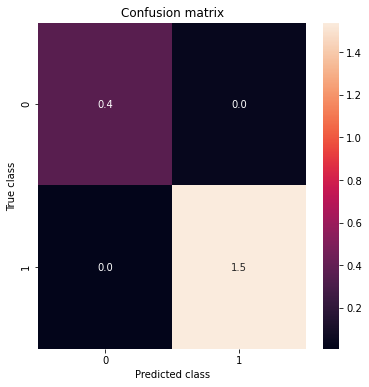

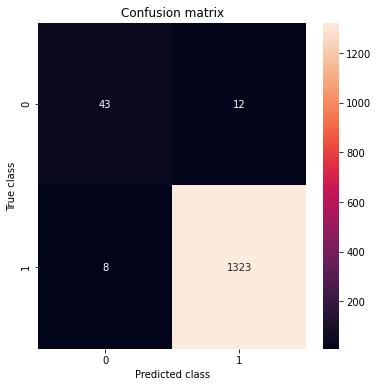

Accuracy: 0.9733597252988442


,0,1,macro avg,weighted avg
precision,0.978846,0.970237,0.974541,0.973457
recall,0.949294,0.987741,0.968517,0.973360
f1-score,0.963843,0.978910,0.971377,0.973275
support,0.541472,0.906135,1.447607,1.447607


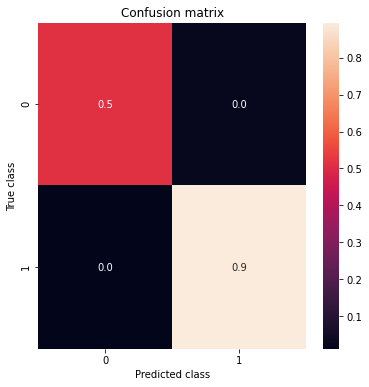

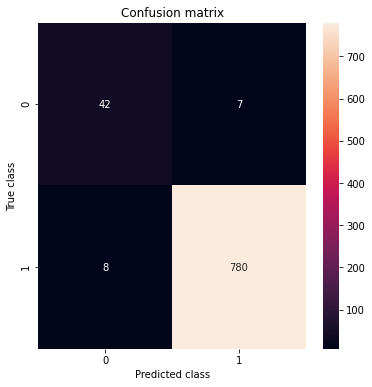

In [14]:
#eval_BC4_{mass}_SR2_Oct2020
scores_per_mass(model2, sets2, masses, 0.4, save = True, dest_path="./scores", title="SR2_Oct2020")

In [15]:
model2.save(dest_path, f"MassParam_SR2_Oct2020")